In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv('books.csv')
df.head()

,count,year,language
0,1,2010,en
1,2,2010,nl
2,3,2010,nl
3,4,2010,nl
4,5,2010,nl


In [3]:
df.language.unique()
order_languages = ['nl', 'en', 'fr']
df['language'] = df.language.astype('category', ordered=True, categories=order_languages)
df.language.dtype

CategoricalDtype(categories=['nl', 'en', 'fr'], ordered=True)

In [5]:
df_peryear_andcountry = df.groupby(['year', 'language'])['count'].count()
print(df_peryear_andcountry)

year  language
2010  nl          10
      en           3
2011  nl           8
      en           5
2012  nl          10
      en           7
      fr           1
2013  nl          16
      en           8
      fr           3
2014  nl           6
      en           6
2015  nl          10
      en           4
      fr           8
2016  nl          10
      en           9
      fr           7
2017  nl          10
      en           4
      fr           8
2018  nl           2
      en           5
      fr           3
2019  nl          15
      en          10
      fr           3
Name: count, dtype: int64


In [6]:
df_plotable = df_peryear_andcountry.unstack(level=1, fill_value=0)
print(df_plotable)

language  nl  en  fr
year                
2010      10   3   0
2011       8   5   0
2012      10   7   1
2013      16   8   3
2014       6   6   0
2015      10   4   8
2016      10   9   7
2017      10   4   8
2018       2   5   3
2019      15  10   3


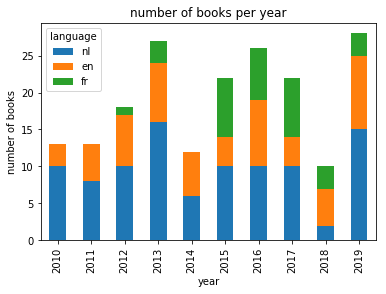

In [8]:
import matplotlib.pyplot as plt
df_plotable.plot(kind='bar', stacked=True)
plt.ylabel('number of books')
plt.title('number of books per year')
plt.show()